In [2]:
from models.stage1.vq import VectorQuantize
from utils import load_yaml_param_settings
import numpy as np
import pandas
conf_dir = 'configs/config.yaml'

config = load_yaml_param_settings(conf_dir)

/home/erlendlokna/Documents/ntnu/Generative-SSL-VQVAE-modelling/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dim = 64
vq = VectorQuantize(dim, config["VQVAE"]["codebook"]["size"], **config["VQVAE"])

Mean absolute correlation of off-diagonal elements: 0.10162811680227322


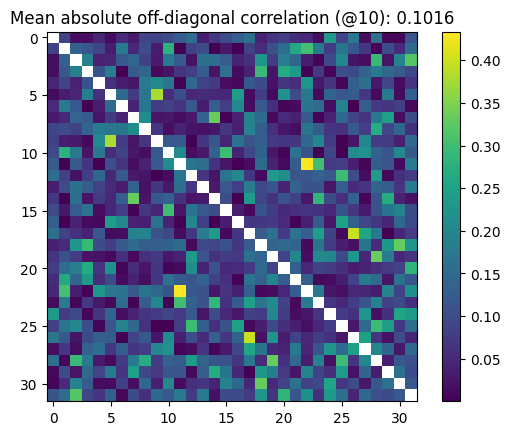

In [5]:
import matplotlib.pyplot as plt
# Assuming corr is your correlation matrix
import numpy as np
import matplotlib.pyplot as plt

corr = np.corrcoef(vq.codebook.cpu().detach().numpy())
corr_viz = corr.copy()

np.fill_diagonal(corr, 0)

# Calculate the mean absolute correlation of the off-diagonal elements
mean_abs_corr_off_diagonal = np.sum(np.abs(corr)) / (corr.shape[0]*(corr.shape[0]-1))

print("Mean absolute correlation of off-diagonal elements:", mean_abs_corr_off_diagonal)

# Set the diagonal elements of corr_viz to np.nan for visualization
np.fill_diagonal(corr_viz, np.nan)

im = plt.imshow(np.abs(corr_viz))
epoch = 10
plt.title(f"Mean absolute off-diagonal correlation (@{epoch}): {np.round(mean_abs_corr_off_diagonal, 4)}")

# Add a colorbar
plt.colorbar(im)

plt.show()

In [57]:
print(31 * 31 * 0.1)

96.10000000000001


In [15]:
# Set the diagonal elements to zero
np.fill_diagonal(corr, 0)

# Sum all the elements
sum_off_diagonal = np.sum(np.abs(corr)) / (2 * (corr.shape[0]-1))

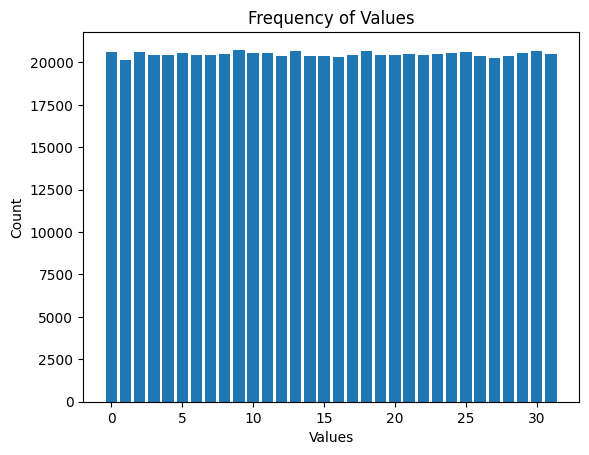

In [1]:
import torch
import matplotlib.pyplot as plt

counts = torch.zeros(32)
s = torch.randint(0, 32, (256, 64, 40))

counts += torch.bincount(s.flatten(), minlength=32)

plt.bar(range(32), counts.numpy())
plt.xlabel('tokens')
plt.ylabel('Count')
plt.title('Frequency of Values')
plt.show()

In [ ]:
import torch
import matplotlib.pyplot as plt

counts = torch.zeros(32)
s = torch.randint(0, 32, (256, 64, 40))

counts += torch.bincount(s.flatten(), minlength=32)

plt.bar(range(32), counts.numpy())
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Frequency of Values')
plt.show()

In [21]:
t = torch.zeros(32)


torch.Size([32])
